<a href="https://colab.research.google.com/github/SaymaSJ/Porject-IoMT-/blob/main/IoMT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import libraries and Dataset**

In [1]:
import os
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

In [2]:
import os
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [3]:
df= pd.read_csv("/content/Health(IoMT).csv")
df.head()

,Temperature (),Heart Rate (BPM),Oxygen Saturation (%),Dry Cough,Muscle Pain,Headache,Runny Nose,Outcome
0,98.8,96,96,0,1,0,1,0
1,100.5,97,93,1,0,0,0,1
2,100.6,96,94,1,1,0,0,1
3,99.3,95,95,1,1,1,1,0
4,100.2,97,93,1,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Temperature ()         1000 non-null   float64
 1   Heart Rate (BPM)       1000 non-null   int64  
 2   Oxygen Saturation (%)  1000 non-null   int64  
 3   Dry Cough              1000 non-null   int64  
 4   Muscle Pain            1000 non-null   int64  
 5   Headache               1000 non-null   int64  
 6   Runny Nose             1000 non-null   int64  
 7   Outcome                1000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 62.6 KB


In [5]:
df.dtypes

Temperature ()           float64
Heart Rate (BPM)           int64
Oxygen Saturation (%)      int64
Dry Cough                  int64
Muscle Pain                int64
Headache                   int64
Runny Nose                 int64
Outcome                    int64
dtype: object

In [6]:
string_col=df.select_dtypes("string").columns.to_list()

In [7]:
num_col=df.columns.to_list()
#print(num_col)
for col in string_col:
    num_col.remove(col)
num_col.remove("Outcome")

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (),1000.0,100.638,1.507185,98.0,99.2,100.5,101.9,103.9
Heart Rate (BPM),1000.0,99.325,5.084804,4.0,96.0,99.0,101.0,116.0
Oxygen Saturation (%),1000.0,94.089,2.832155,88.0,92.0,95.0,96.0,99.0
Dry Cough,1000.0,0.492,0.500186,0.0,0.0,0.0,1.0,1.0
Muscle Pain,1000.0,0.497,0.500241,0.0,0.0,0.0,1.0,1.0
Headache,1000.0,0.532,0.499225,0.0,0.0,1.0,1.0,1.0
Runny Nose,1000.0,0.490,0.500150,0.0,0.0,0.0,1.0,1.0
Outcome,1000.0,0.657,0.474949,0.0,0.0,1.0,1.0,1.0


In [9]:
px.imshow(df.corr(),title="Correlation Plot of the Viral fever Prediction")

[]

<Figure size 1000x800 with 0 Axes>

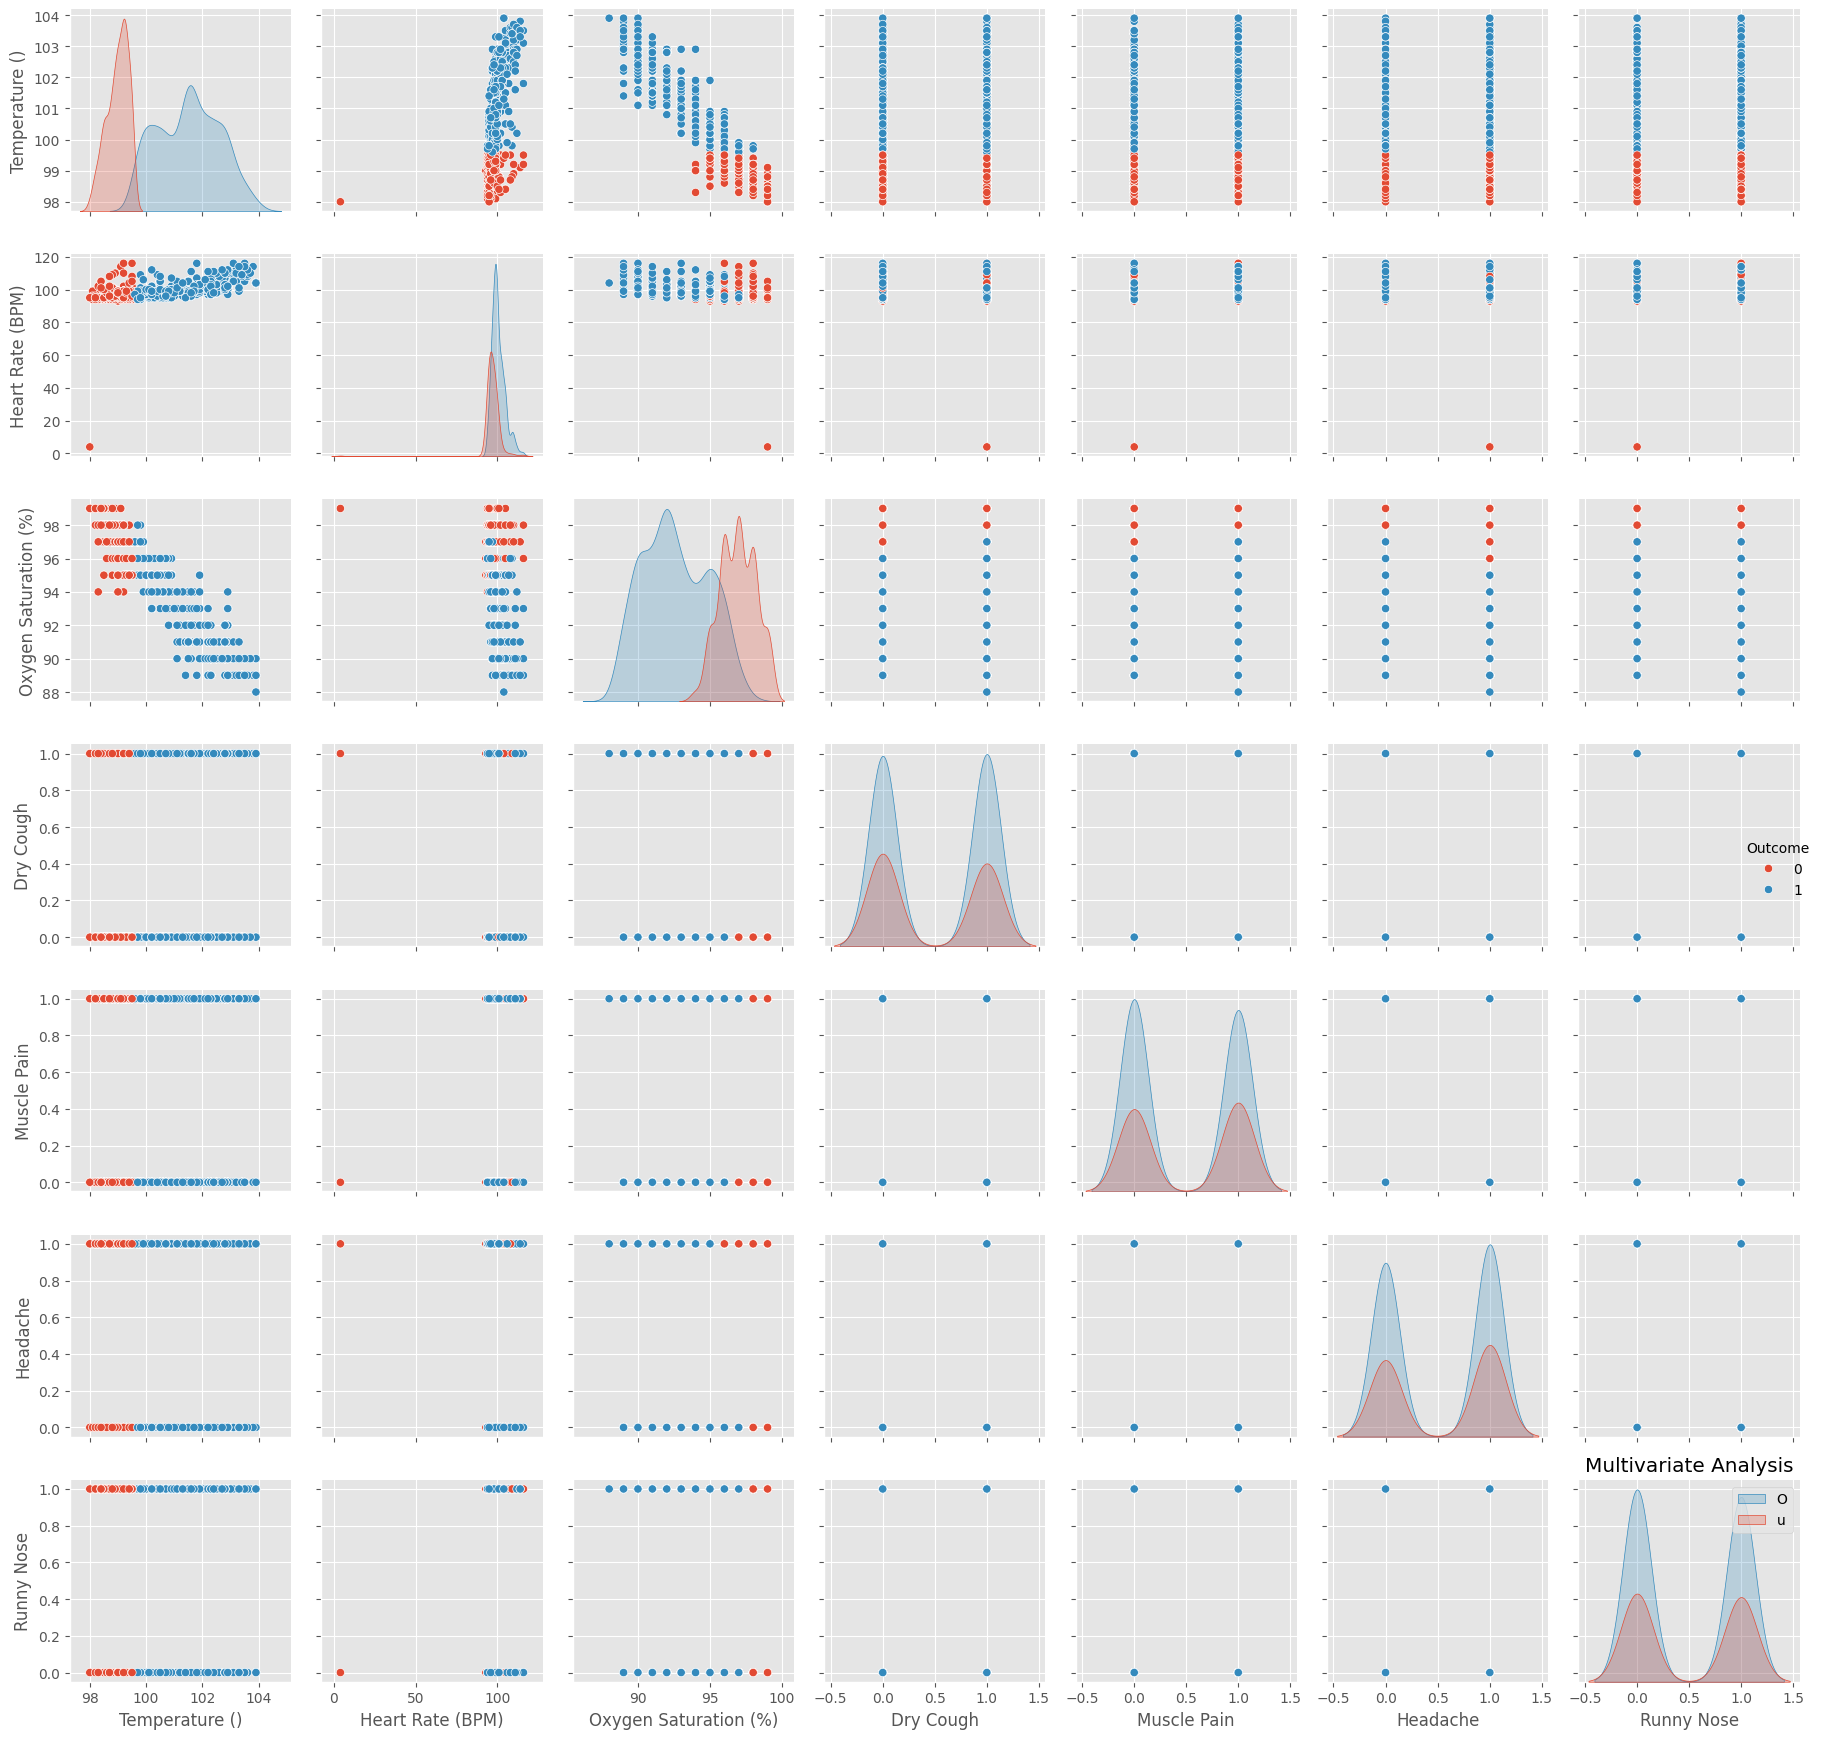

In [10]:
plt.figure(figsize=(10,8))
sns.pairplot(df,hue="Outcome")
plt.title("Multivariate Analysis")
plt.legend("Outcome")
plt.tight_layout()
plt.plot()

**Handling missing values**


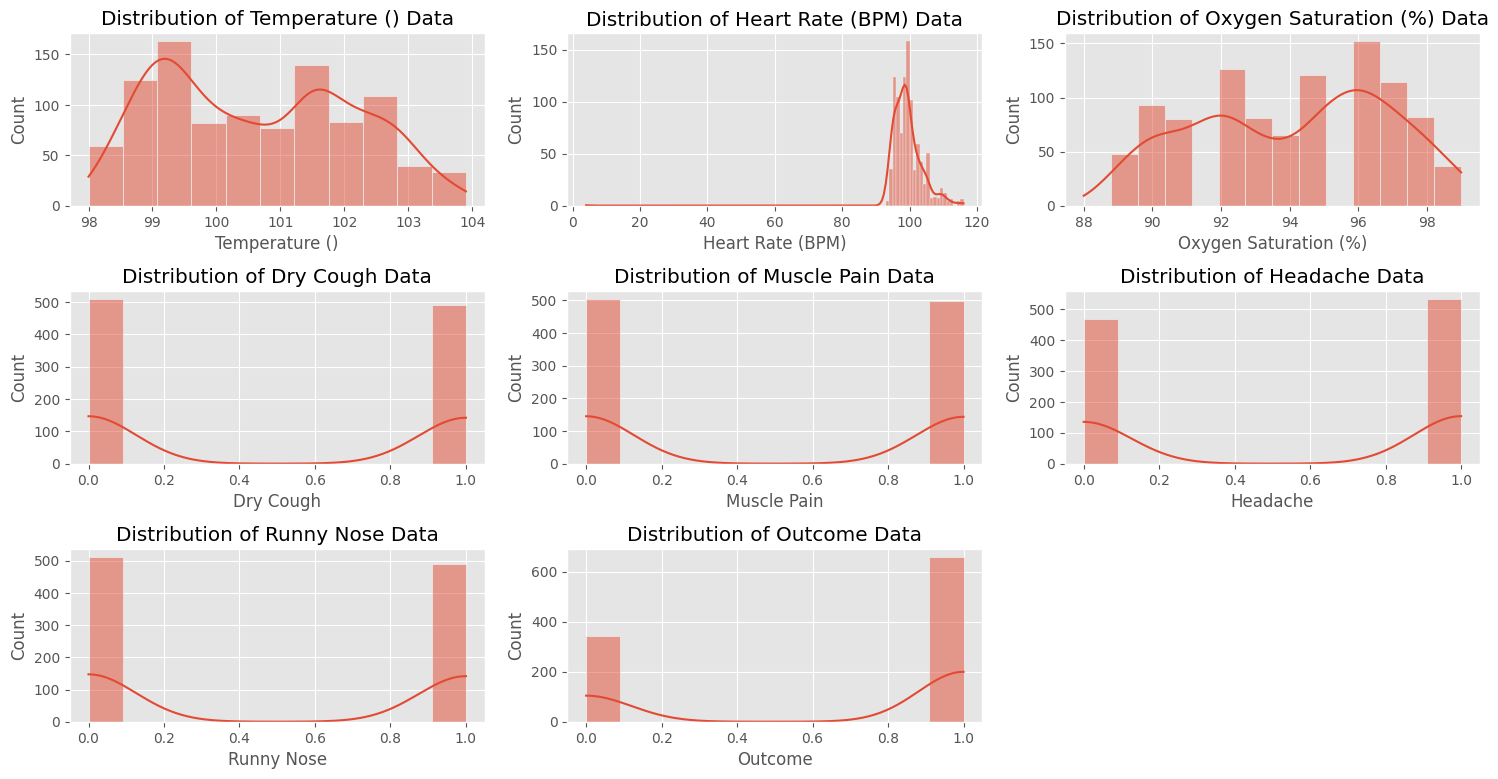

In [13]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

In [12]:
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")

In [14]:
import missingno as msno

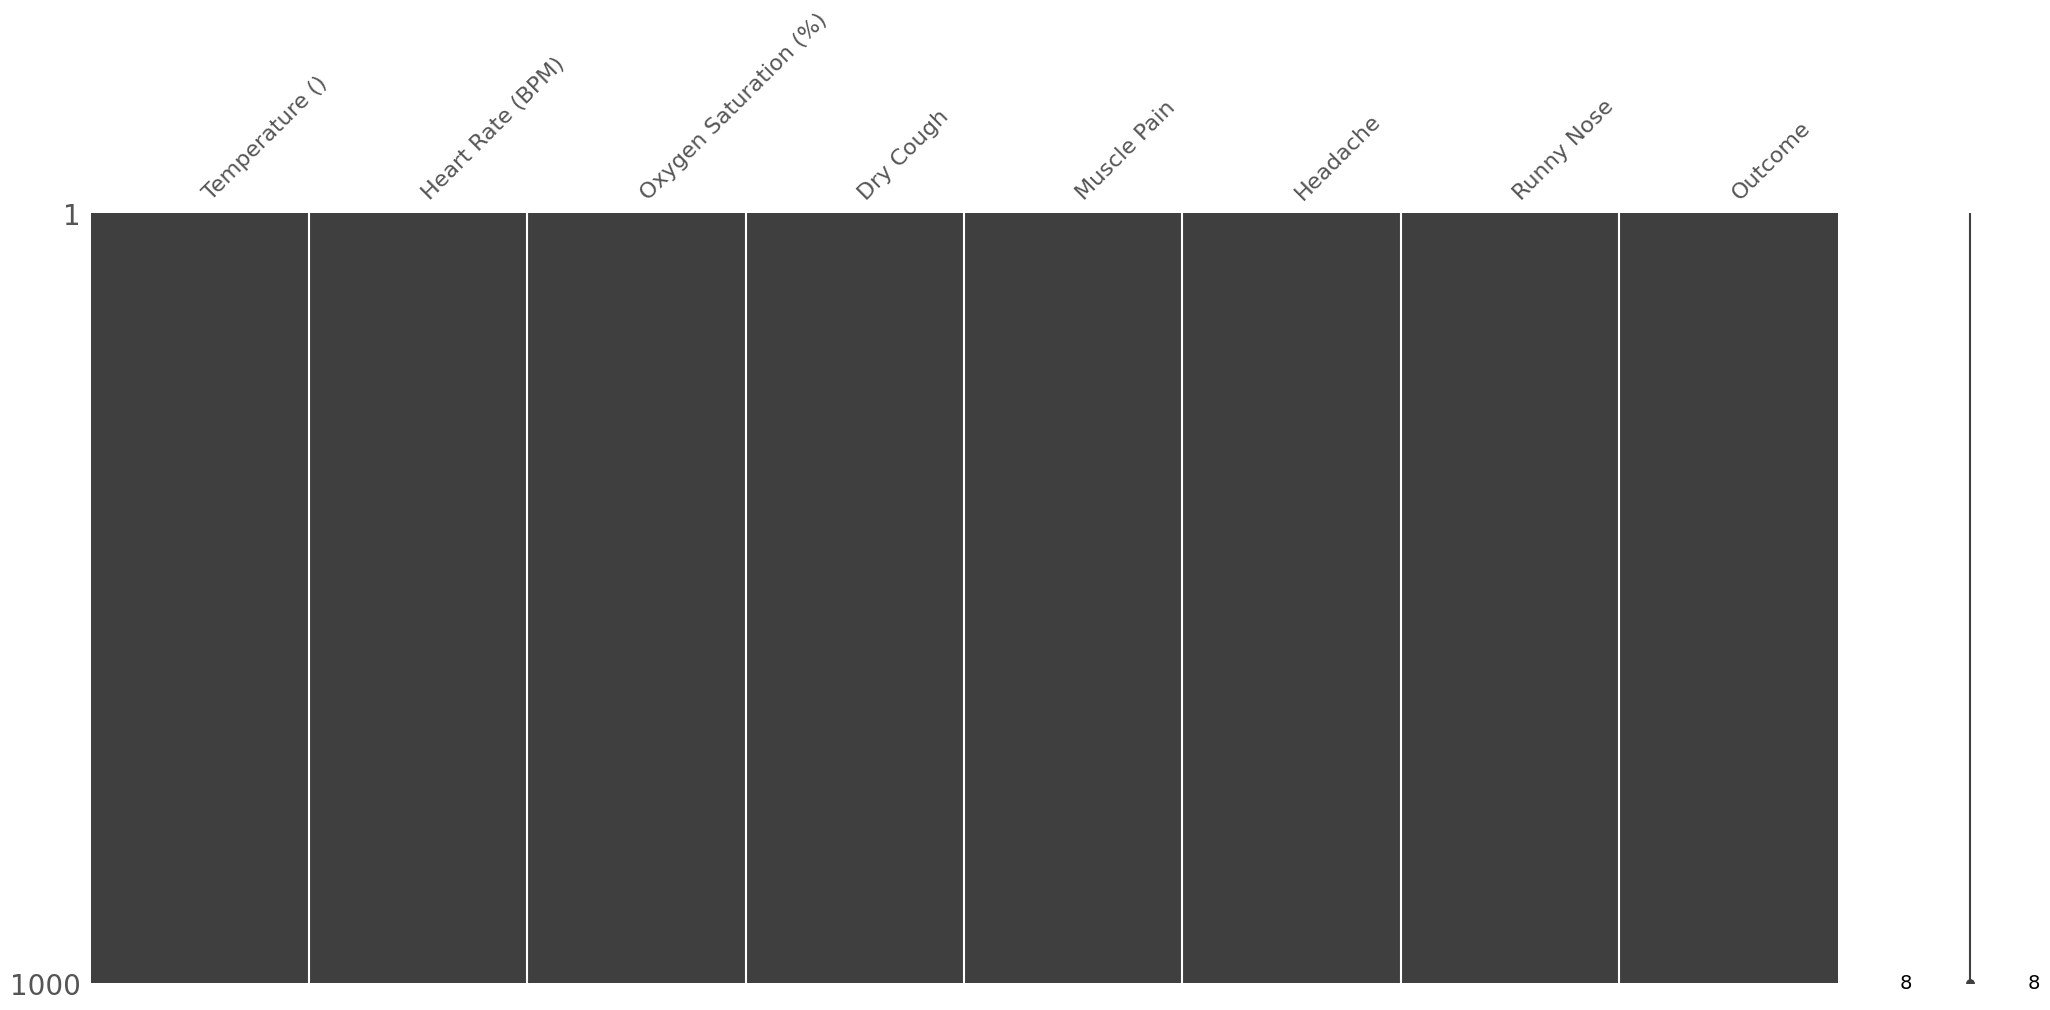

<Figure size 1500x900 with 0 Axes>

In [15]:
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()


In [16]:
df.isnull().sum()

Temperature ()           0
Heart Rate (BPM)         0
Oxygen Saturation (%)    0
Dry Cough                0
Muscle Pain              0
Headache                 0
Runny Nose               0
Outcome                  0
dtype: int64

In [17]:
fig = px.box(df,y='Temperature ()',x='Outcome',title=f"Distrubution of Temperature")
fig.show()

In [18]:
fig = px.box(df,y='Heart Rate (BPM)',x='Outcome',title=f"Distrubution of RestingBP")
fig.show()

In [19]:
fig = px.box(df,y='Oxygen Saturation (%)',x='Outcome',title=f"Distrubution of RestingBP")
fig.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
import seaborn as sb


# Imbalance data(SMOTE)

In [20]:

!pip install py-AutoClean

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 2.0 MB/s eta 0:00:00
  Created wheel for py-AutoClean: filename=py_AutoClean-1.1.3-py3-none-any.whl size=10273 sha256=9c065ab3ff1506b8e40ddcd4e7a3fc4b3f59c0dbe0c2ed34c625057d5f8abb06
  Stored in directory: /root/.cache/pip/wheels/b5/13/2b/3a5fdae6161f870ea670f2bf3a7157f8a5b38b166282b6bc92
Successfully built py-AutoClean


In [21]:
from AutoClean import AutoClean

In [22]:
df.shape

(1000, 8)

In [23]:
from collections import Counter
!pip install imblearn

In [24]:
print(sorted(Counter(df['Outcome']).items()))

[(0, 343), (1, 657)]


In [25]:
from imblearn.over_sampling import SMOTE


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()#creation of instance
scaler.fit(df.drop('Outcome',axis=1))
scaled_features = scaler.transform(df.drop('Outcome',axis=1))

In [27]:
X = scaled_features
y = df['Outcome']

In [28]:
print(f'X:{X.shape}')
print(f'y:{y.shape}')

X:(1000, 7)
y:(1000,)


Counter({1: 657, 0: 343})


<Axes: ylabel='count'>

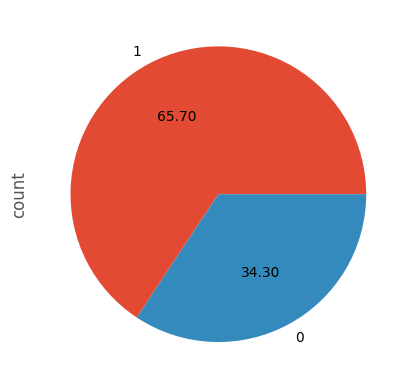

In [29]:
y.value_counts()
counter = Counter(y)
print(counter)
y.value_counts().plot.pie(autopct='%.2f')

[(0, 657), (1, 657)] (1314,)


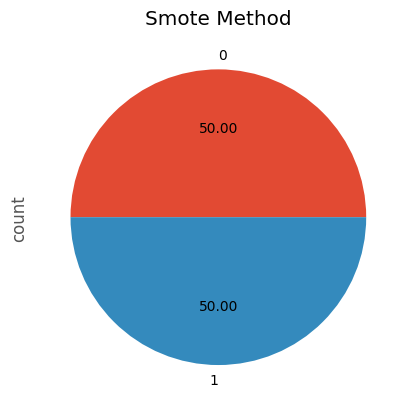

In [30]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
X_res, y_res = sm.fit_resample(X,y)
ax= y_res.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title("Smote Method")
print(sorted(Counter(y_res).items()),y_res.shape)

<Axes: xlabel='Outcome'>

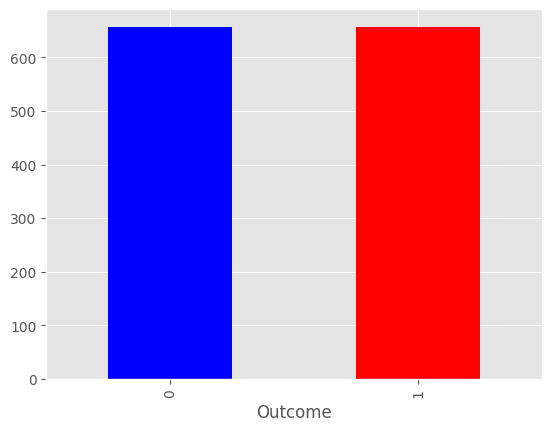

In [31]:
 y_res.value_counts().plot(kind = 'bar', color = ['blue', 'red'])

In [32]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(8, 6))
# plt.scatter(X_res[y_res == 0][:, 0], X_res[y_res == 0][:, 1], label='Outcome 0 (Synthetic)', alpha=0.5)
# plt.scatter(X_res[y_res == 1][:, 0], X_res[y_res == 1][:, 1], label='Outcome 1 (Synthetic)', alpha=0.5)
# plt.xlabel('Standardized Feature 1')
# plt.ylabel('Standardized Feature 2')
# plt.title('Scatter Plot after SMOTE (with Standardization)')
# plt.legend()
# plt.show()
# from matplotlib import pyplot
# from numpy import where
# for label, _ in counter.items():
# row_ix = where(y == label)[0]
# plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
# plt.legend()
# plot_params.show()

In [33]:
print(f"X_res shape: {X_res.shape}")
print(f"y_res shape: {y_res.shape}")

X_res shape: (1314, 7)
y_res shape: (1314,)


In [34]:
X_res = X_res[:1000]
y_res = y_res[:1000]

# Train-test data

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, stratify=y, random_state=42)
print(X.shape, X_train.shape, X_test.shape)

(1000, 7) (750, 7) (250, 7)


# Logistic Regression

In [36]:
from sklearn.metrics import confusion_matrix , classification_report


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline


In [63]:
from sklearn.model_selection import GridSearchCV
model_1 = LogisticRegression()


# forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

# clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

# clf.fit(X_train, y_train)

# print(clf.best_params_)

# print(clf.best_score_)


# Create a pipeline with scaler and logistic regression
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, solver='saga', tol=0.1))

# Create a parameter grid
param_grid = {
    'logisticregression__C': [0.1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2']
}

# Create GridSearchCV object
model_1 = GridSearchCV(pipe, param_grid, cv=5,return_train_score=False,scoring='accuracy' )

# Fit the model
# grid_search.fit(X, y)
model_1.fit(X_train, y_train)
#  return_train_score=False,scoring='f1_macro')

# Print best parameters and best score
print("Best Parameters:", model_1.best_params_)
print("Best Score:", model_1.best_score_)


model_1.cv_results_

Best Parameters: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1'}
Best Score: 0.9306666666666666


{'mean_fit_time': array([0.01113   , 0.00820007, 0.00588965, 0.00768633, 0.00737524,
        0.00762424, 0.00994153, 0.0124907 ]),
 'std_fit_time': array([0.00196981, 0.00341298, 0.00360385, 0.00424907, 0.00307399,
        0.00282757, 0.00288529, 0.00280201]),
 'mean_score_time': array([0.0016067 , 0.00158353, 0.00227656, 0.00234599, 0.00231104,
        0.00222807, 0.00146389, 0.00457702]),
 'std_score_time': array([1.22148332e-04, 7.51246917e-05, 1.62848787e-03, 8.26518978e-04,
        1.86012571e-03, 1.09723982e-03, 1.37327943e-04, 3.44894646e-03]),
 'param_logisticregression__C': masked_array(data=[0.1, 0.1, 1, 1, 10, 10, 100, 100],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_logisticregression__penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=o

In [58]:
data = pd.DataFrame(model_1.cv_results_)
data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007145,0.004934,0.004135,0.000648,0.1,l1,"{'logisticregression__C': 0.1, 'logisticregres...",0.989899,0.878788,0.848485,0.887755,0.867347,0.894455,0.049493,2
1,0.004194,0.000094,0.003709,0.000400,0.1,l2,"{'logisticregression__C': 0.1, 'logisticregres...",0.969697,0.868687,0.858586,0.887755,0.867347,0.890414,0.040768,8
2,0.004476,0.000140,0.003598,0.000170,1,l1,"{'logisticregression__C': 1, 'logisticregressi...",0.989899,0.878788,0.868687,0.887755,0.857143,0.896454,0.047825,1
3,0.004207,0.000091,0.003551,0.000304,1,l2,"{'logisticregression__C': 1, 'logisticregressi...",0.979798,0.868687,0.868687,0.887755,0.867347,0.894455,0.043339,2
4,0.004593,0.000139,0.004410,0.001103,10,l1,"{'logisticregression__C': 10, 'logisticregress...",0.979798,0.868687,0.868687,0.897959,0.857143,0.894455,0.044757,2
5,0.004310,0.000188,0.003488,0.000071,10,l2,"{'logisticregression__C': 10, 'logisticregress...",0.979798,0.878788,0.858586,0.897959,0.846939,0.892414,0.047042,6
6,0.004501,0.000183,0.003475,0.000178,100,l1,"{'logisticregression__C': 100, 'logisticregres...",0.979798,0.878788,0.858586,0.887755,0.857143,0.892414,0.045237,7
7,0.004200,0.000114,0.004068,0.001077,100,l2,"{'logisticregression__C': 100, 'logisticregres...",0.979798,0.868687,0.858586,0.897959,0.857143,0.892435,0.046083,5


from matplotlib import pyplot as plt
data['mean_fit_time'].plot(kind='hist', bins=20, title='mean_fit_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['std_fit_time'].plot(kind='hist', bins=20, title='std_fit_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['mean_score_time'].plot(kind='hist', bins=20, title='mean_score_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['std_score_time'].plot(kind='hist', bins=20, title='std_score_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('param_logisticregression__C').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('param_logisticregression__penalty').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='mean_fit_time', y='std_fit_time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='std_fit_time', y='mean_score_time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='mean_score_time', y='std_score_time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='std_score_time', y='split0_test_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['mean_fit_time']
  ys = series['split0_test_score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('mean_fit_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('param_logisticregression__C')):
  _plot_series(series, series_name, i)
  fig.legend(title='param_logisticregression__C', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('mean_fit_time')
_ = plt.ylabel('split0_test_score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['mean_fit_time']
  ys = series['split0_test_score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('mean_fit_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('param_logisticregression__penalty')):
  _plot_series(series, series_name, i)
  fig.legend(title='param_logisticregression__penalty', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('mean_fit_time')
_ = plt.ylabel('split0_test_score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['mean_fit_time']
  ys = series['split1_test_score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('mean_fit_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('param_logisticregression__C')):
  _plot_series(series, series_name, i)
  fig.legend(title='param_logisticregression__C', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('mean_fit_time')
_ = plt.ylabel('split1_test_score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['mean_fit_time']
  ys = series['split1_test_score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('mean_fit_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('param_logisticregression__penalty')):
  _plot_series(series, series_name, i)
  fig.legend(title='param_logisticregression__penalty', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('mean_fit_time')
_ = plt.ylabel('split1_test_score')

from matplotlib import pyplot as plt
data['mean_fit_time'].plot(kind='line', figsize=(8, 4), title='mean_fit_time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['std_fit_time'].plot(kind='line', figsize=(8, 4), title='std_fit_time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['mean_score_time'].plot(kind='line', figsize=(8, 4), title='mean_score_time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['std_score_time'].plot(kind='line', figsize=(8, 4), title='std_score_time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['param_logisticregression__penalty'].value_counts()
    for x_label, grp in data.groupby('param_logisticregression__C')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('param_logisticregression__C')
_ = plt.ylabel('param_logisticregression__penalty')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['param_logisticregression__C'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='mean_fit_time', y='param_logisticregression__C', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['param_logisticregression__penalty'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='mean_fit_time', y='param_logisticregression__penalty', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['param_logisticregression__C'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='std_fit_time', y='param_logisticregression__C', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['param_logisticregression__penalty'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='std_fit_time', y='param_logisticregression__penalty', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# Assign algorithm
lr=LogisticRegression( penalty='l1', solver='liblinear')



# Link algorithm to X and y variables
lr.fit(X_train, y_train)

# Run algorithm on test data to make predictions
y1_pred = lr.predict(X_test)

# Evaluate predictions
print(confusion_matrix(y_test, y1_pred))
print(classification_report(y_test,y1_pred))
lr.score=(X_test,y_test)
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y1_pred)
recall = recall_score(y_test, y1_pred)
f1 = f1_score(y_test, y1_pred)

print("Accuracy:", accuracy_score(y_test, y1_pred))
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

[[ 86   0]
 [  1 163]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        86
           1       1.00      0.99      1.00       164

    accuracy                           1.00       250
   macro avg       0.99      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



NameError: name 'precision_score' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score, accuracy_score, recall_score



# Define the model
model = LogisticRegression()

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'saga'],       # Solver for optimization problem
    'penalty': ['l1', 'l2'],               # Penalty (L1 or L2 regularization)
}

# Define scoring metrics
scoring = {
    'f1_score': make_scorer(f1_score),
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score)
}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring, refit='f1_score')
grid_search.fit(X_res, y_res)

# Get the best parameters and scores
print("Best parameters found:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)
print("Best accuracy:", grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_])
print("Best recall:", grid_search.cv_results_['mean_test_recall'][grid_search.best_index_])

Best parameters found: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1 score: 0.9992395437262358
Best accuracy: 0.999
Best recall: 0.9984848484848484


# SVM